In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')


# Setting a seed for reproducibility

In [4]:
np.random.seed(42)

In [9]:
df.to_csv('/content/drive/MyDrive/data_clean_Assingment3.csv')

# Part a: Random sample of 25 observations

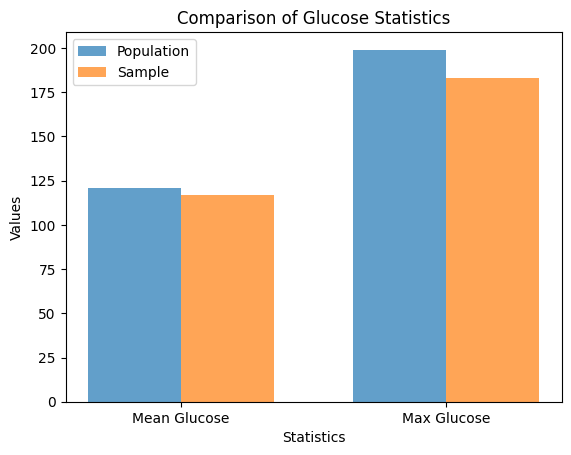

In [5]:
sample = df.sample(25)
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Population statistics
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# Creating a bar graph for comparison
variables = ['Mean Glucose', 'Max Glucose']
population_values = [population_mean_glucose, population_max_glucose]
sample_values = [sample_mean_glucose, sample_max_glucose]

bar_width = 0.35  # Width of the bars
index = np.arange(len(variables))  # Index for the variables

# Plotting the bars
plt.bar(index, population_values, bar_width, label='Population', alpha=0.7)
plt.bar(index + bar_width, sample_values, bar_width, label='Sample', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of Glucose Statistics')
plt.xticks(index + bar_width / 2, variables)
plt.legend()

# Show the plot
plt.show()

# Part b: 98th percentile of BMI

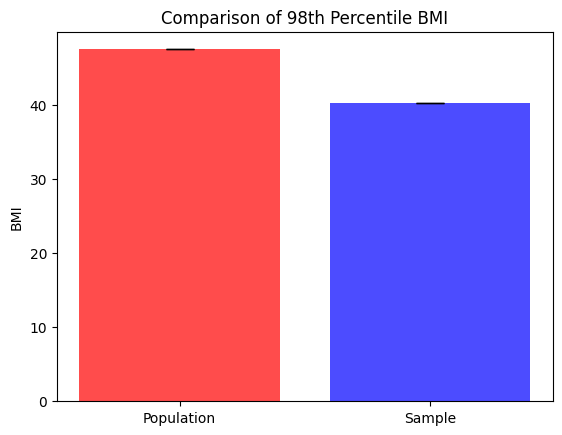

In [6]:


# Population and sample BMI data
population_bmi = df['BMI']
sample_bmi = sample['BMI']

# 98th percentile BMI
population_percentile_bmi = np.percentile(population_bmi, 98)
sample_percentile_bmi = np.percentile(sample_bmi, 98)

# Create a bar chart with error bars for comparison
variables = ['Population', 'Sample']
percentiles = [population_percentile_bmi, sample_percentile_bmi]
errors = [0, 0]  # Since we're plotting points, the error bars are set to 0

plt.bar(variables, percentiles, yerr=errors, color=['red', 'blue'], alpha=0.7, capsize=10)
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI')
plt.show()


# Part c: Bootstrap samples for BloodPressure

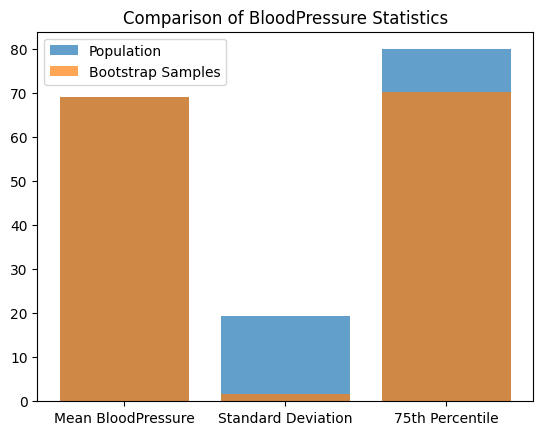

In [7]:
bootstrap_samples = [df['BloodPressure'].sample(150, replace=True).mean() for _ in range(500)]

# Calculating statistics for the population
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_bp = np.percentile(df['BloodPressure'], 75)

# Calculating statistics for the bootstrap samples
bootstrap_mean_bp = np.mean(bootstrap_samples)
bootstrap_std_bp = np.std(bootstrap_samples)
bootstrap_percentile_bp = np.percentile(bootstrap_samples, 75)

# Creating a bar chart for comparison
variables = ['Mean BloodPressure', 'Standard Deviation', '75th Percentile']
population_values = [population_mean_bp, population_std_bp, population_percentile_bp]
bootstrap_values = [bootstrap_mean_bp, bootstrap_std_bp, bootstrap_percentile_bp]

plt.bar(variables, population_values, label='Population', alpha=0.7)
plt.bar(variables, bootstrap_values, label='Bootstrap Samples', alpha=0.7)
plt.legend()
plt.title('Comparison of BloodPressure Statistics')
plt.show()

Findings:

Mean glucose values are consistent between the sample and population, but the sample's maximum glucose tends to be lower.


The boxplot shows BMI distribution, focusing on the 98th percentile. Interestingly, the sample's 98th percentile BMI is slightly lower than the population's, indicating a potential difference in the upper BMI range.

Bootstrap samples of blood pressure demonstrate similar averages to the population but exhibit higher variability. This suggests that the bootstrap method captures the blood pressure variability within the population, with some samples showing more scattered values.